# 1.5-Supervised-learning-algorithms-ANN - pt2

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [11]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

pd.set_option('display.max_columns', None)

In [13]:
#Create a path to where your data is stored.
path = r'C:\Users\IVON6\ClimateWins'

In [15]:
#Read in the European weather data and Answers Data set.

climate = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
answers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Weather_Prediction_Pleasant_Weather.csv'))

In [17]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.10,0.85,1.02,0.32,0.09,0,0.70,6.50,0.80,10.90,1,0.81,1.02,0.88,0.00,7.00,3.70,-0.90,7.90,4,0.67,1.02,0.44,0.01,2.30,2.40,-0.40,5.10,7,7.70,0.85,1.00,0.07,0.25,0.00,9.30,7.40,11.00,8,5.40,0.83,1.02,0.12,0.08,0,0.00,10.00,7.00,11.50,8,0.91,0.00,0,0.80,-0.30,1.60,7,0.91,1.00,0.13,0.22,0,0.00,10.60,9.40,8.30,2.90,0.82,1.01,0.28,0.48,1.60,7.90,3.90,9.40,8,1.40,1.00,1.02,0.20,0.00,0.00,-0.60,-1.90,0.50,7,8.70,0.83,1.01,0.22,0.32,1.00,9.50,8.50,11.10,6,0.00,0.92,1.03,0.53,0.00,1.40,7.60,4.40,10.80,5,0.67,0.20,0.10,0,0.00,6.90,1.10,10.40,8,4.00,0.98,1.00,0.04,1.14,0,0.00,4.90,3.80,5.90,3,2.60,0.73,1.02,7.10,7.80,4,4.50,0.73,1.03,0.48,0.01,2.30,-5.90,-8.50,-3.20,5,1.01,0.05,0.32,0.00,4.20,2.20,4.90,3.80,0.76,1.02,1.54,0.44,10.00,7.80,12.20,5,0.88,1.00,0.45,0

In [19]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Data Preparation

In [22]:
#dropping unrelated station data from main dataset
df = climate.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max']).copy()

In [24]:
#create a scaler object using StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#create new df with scaled data

df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns = df.columns

df_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.71,-1.60,0.66,-0.03,0.83,-0.00,-1.10,-0.27,-0.18,-0.90,-0.53,-0.85,-0.48,-1.21,0.91,0.32,-0.74,-0.37,0.28,-1.02,-1.22,-0.95,-0.26,-0.01,-0.01,-1.12,-0.32,-0.77,-1.10,-1.12,-1.14,0.71,2.78,0.36,-1.23,-1.20,0.05,-1.08,-0.11,0.26,-0.41,1.23,0.82,0.63,-0.01,-1.16,-0.31,-0.13,-1.01,-0.11,0.06,-0.41,0.83,1.33,-1.38,-1.19,0.14,-0.07,-1.06,-0.11,0.39,-1.04,0.42,0.45,-0.80,-1.07,0.75,-0.65,-0.18,-0.25,-0.47,1.21,-0.02,1.86,-0.01,-1.20,-0.41,-1.15,-1.37,-1.13,-1.58,0.70,2.34,0.27,-1.04,-1.05,0.25,-0.81,-0.10,0.38,-0.39,0.86,-1.42,1.89,1.15,-1.42,-0.32,-1.52,-0.99,-0.88,-1.04,-0.09,-0.75,-1.24,-0.28,-0.31,-1.10,-0.27,-0.51,-0.35,1.11,0.82,1.54,-1.14,-1.07,1.93,-0.47,-1.02,-0.19,0.09,-0.47,-0.43,-0.66,-0.63,0.10,-1.24,-0.65,-0.55,-0.12,-0.17,-0.06,-0.06,-0.00,-1.08,0.48,-1.01,-0.39,-0.29,-0.64,-0.44,0.76,-1.30,-0.81,-0.09,-0.02,0.37,-0.67,-0.52,-0.75
1,-1.71,-1.60,0.24,-0.03,0.74,-0.00,-1.06,1.66,-0.18,-0.81,-0.58,-0.46,-0.57,0.65,1.12,0.02,-1.42,-0.37,-1.33,-1.11,-0.82,-1.30,-0.26,-0.01,-0.01,-1.42,0.37,-1.34,-1.11,-0.88,-1.34,1.18,0.45,0.87,-0.99,-1.12,-0.37,-1.05,-0.37,0.09,-0.78,1.23,-0.17,1.14,-0.01,-1.09,1.08

In [26]:
#Create an 'X' and Y df by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'],axis=1)

In [28]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Artificial Neural Network (ANN) Model:

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the ANN model
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, tol=0.0001)
mlp_model.fit(X_train_scaled, y_train)

# Check accuracy
train_accuracy_ann = mlp_model.score(X_train_scaled, y_train)
test_accuracy_ann = mlp_model.score(X_test_scaled, y_test)

print(f'ANN Train Accuracy: {train_accuracy_ann}')
print(f'ANN Test Accuracy: {test_accuracy_ann}')

ANN Train Accuracy: 0.5633860097606321
ANN Test Accuracy: 0.5629139072847682


['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


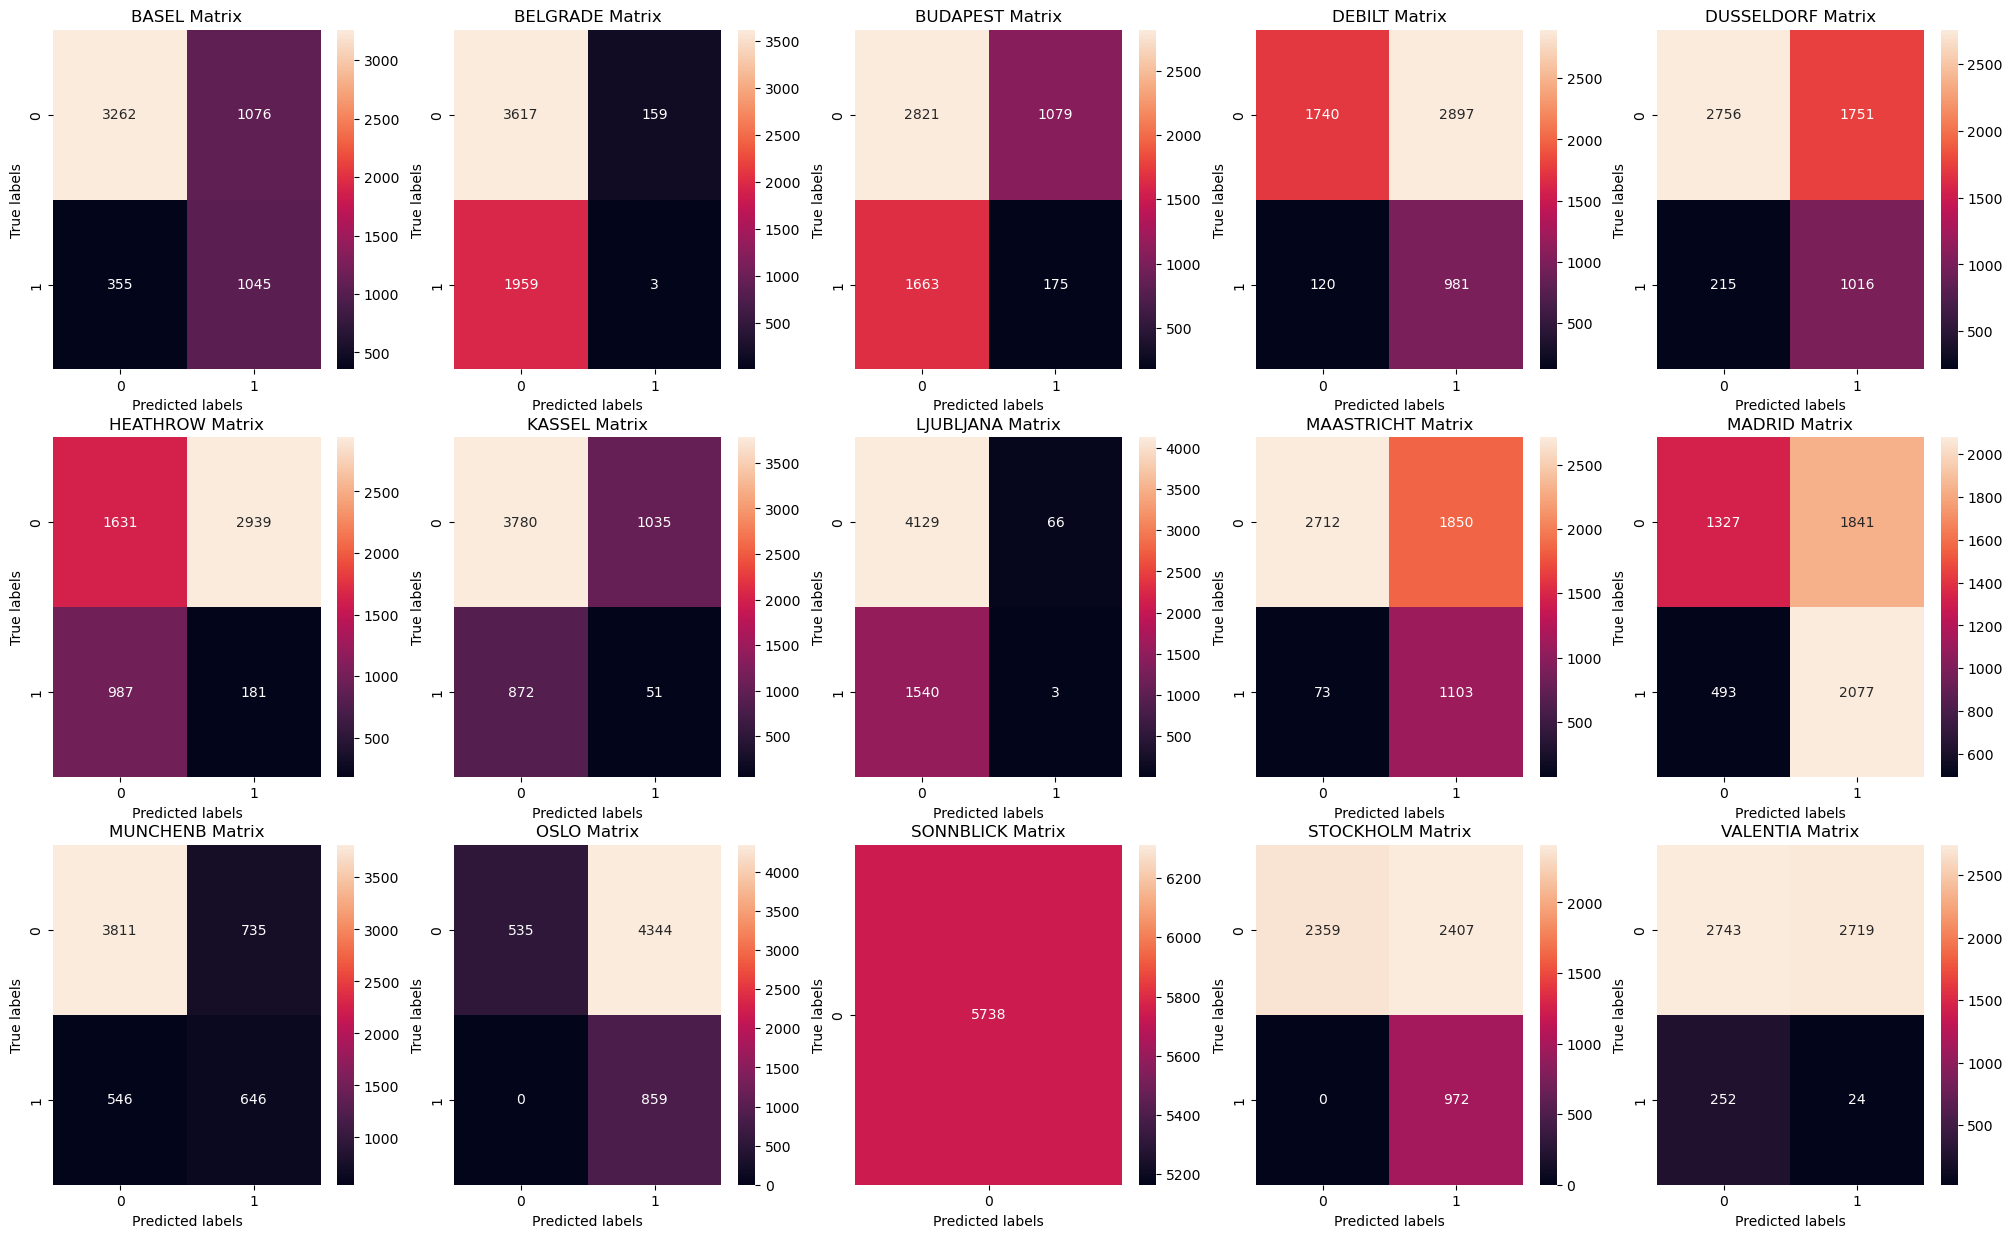

In [33]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], mlp_model.predict(X_test)[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

plt.show()

### Initial Results (hidden layers: 10, 10):

### Train Accuracy: 0.563 (56.3%)
### Test Accuracy: 0.562 (56.2%)

#### The model is struggling to learn the data effectively. The training and testing accuracies are quite similar, which means the model is not overfitting, but it's also not performing well on the data, indicating that the model complexity or structure might not be suitable for the dataset.

### Scaling Data

In [39]:
#Create an 'X' and Y df by dropping the unneeded columns.
X = df_scaled.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'],axis=1)

In [41]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the ANN model
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, tol=0.0001)
mlp_model.fit(X_train_scaled, y_train)

# Check accuracy
train_accuracy_ann = mlp_model.score(X_train_scaled, y_train)
test_accuracy_ann = mlp_model.score(X_test_scaled, y_test)

print(f'ANN Train Accuracy: {train_accuracy_ann}')
print(f'ANN Test Accuracy: {test_accuracy_ann}')

ANN Train Accuracy: 0.5576923076923077
ANN Test Accuracy: 0.5547228999651447


### Scaling helps ANN models converge better because the weights are adjusted more effectively when the features are on the same scale. However, you’re still seeing moderate accuracy, which indicates that even with scaling, the data might be difficult for the model to classify accurately.

In [46]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the ANN model
mlp_model = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=700, tol=0.0001)
mlp_model.fit(X_train_scaled, y_train)

# Check accuracy
train_accuracy_ann = mlp_model.score(X_train_scaled, y_train)
test_accuracy_ann = mlp_model.score(X_test_scaled, y_test)

print(f'ANN Train Accuracy: {train_accuracy_ann}')
print(f'ANN Test Accuracy: {test_accuracy_ann}')

ANN Train Accuracy: 0.4809435277713223
ANN Test Accuracy: 0.4850121993726037


### Adjusting Parameters ( hidden layers: 5, 5):

#### We observed a dip in accuracy with smaller hidden layers and iterations, especially with:
#### Train Accuracy: 48.0%
#### Test Accuracy: 48.5%

#### These accuracies are below 50%, which suggests that the model is not learning effectively. This could be due to the ANN being too simple for the complexity of the data or not running enough iterations.

In [49]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the ANN model
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=300, tol=0.0001)
mlp_model.fit(X_train_scaled, y_train)

# Check accuracy
train_accuracy_ann = mlp_model.score(X_train_scaled, y_train)
test_accuracy_ann = mlp_model.score(X_test_scaled, y_test)

print(f'ANN Train Accuracy: {train_accuracy_ann}')
print(f'ANN Test Accuracy: {test_accuracy_ann}')

ANN Train Accuracy: 0.5609458517313503
ANN Test Accuracy: 0.5487974904147787


In [51]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the ANN model
mlp_model = MLPClassifier(hidden_layer_sizes=(12, 12), max_iter=150, tol=0.0005)
mlp_model.fit(X_train_scaled, y_train)

# Check accuracy
train_accuracy_ann = mlp_model.score(X_train_scaled, y_train)
test_accuracy_ann = mlp_model.score(X_test_scaled, y_test)

print(f'ANN Train Accuracy: {train_accuracy_ann}')
print(f'ANN Test Accuracy: {test_accuracy_ann}')

ANN Train Accuracy: 0.5471763885661166
ANN Test Accuracy: 0.5444405716277448


In [53]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the ANN model
mlp_model = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1000, tol=0.000001)
mlp_model.fit(X_train_scaled, y_train)

# Check accuracy
train_accuracy_ann = mlp_model.score(X_train_scaled, y_train)
test_accuracy_ann = mlp_model.score(X_test_scaled, y_test)

print(f'ANN Train Accuracy: {train_accuracy_ann}')
print(f'ANN Test Accuracy: {test_accuracy_ann}')

ANN Train Accuracy: 0.7113060655356728
ANN Test Accuracy: 0.6760195189961659


In [55]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the ANN model
mlp_model = MLPClassifier(hidden_layer_sizes=(40, 40), max_iter=2000, alpha=0.01)  # alpha adds regularization
mlp_model.fit(X_train_scaled, y_train)

# Check accuracy
train_accuracy_ann = mlp_model.score(X_train_scaled, y_train)
test_accuracy_ann = mlp_model.score(X_test_scaled, y_test)

print(f'ANN Train Accuracy: {train_accuracy_ann}')
print(f'ANN Test Accuracy: {test_accuracy_ann}')

ANN Train Accuracy: 0.7458168719498025
ANN Test Accuracy: 0.6509236667828512


#### Increased Complexity and Training Time (hidden layers: 40, 40, max_iter: 2000):

#### Train Accuracy: 0.745 (74.5%)
#### Test Accuracy: 0.650 (65.0%)

#### By increasing the number of layers, neurons, and iterations, the model's performance improves. The model is starting to learn the patterns in the data better. However, the test accuracy is still significantly lower than the training accuracy, which could be an indication of slight overfitting.

In [58]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the ANN model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000, tol=0.0001)
mlp_model.fit(X_train_scaled, y_train)

# Check accuracy
train_accuracy_ann = mlp_model.score(X_train_scaled, y_train)
test_accuracy_ann = mlp_model.score(X_test_scaled, y_test)

print(f'ANN Train Accuracy: {train_accuracy_ann}')
print(f'ANN Test Accuracy: {test_accuracy_ann}')

ANN Train Accuracy: 0.753079247036951
ANN Test Accuracy: 0.6427326594632276


#### The results we achieved with the ANN model after adding regularization (alpha=0.01) show a significant improvement, especially compared to the previous iterations.

### Interpretation of the Results:
#### Train Accuracy: 75.3%
#### The model is learning the patterns in the training data more effectively, achieving a solid performance on the training set without memorizing too much of the noise. This suggests that the regularization has helped control overfitting by penalizing large weights, which forces the model to learn simpler patterns.

#### Test Accuracy: 64.2%
#### The test accuracy is lower than previous attempts, showing that the model is not doing better generalizing to unseen data and there is still a gap between train and test accuracy.

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


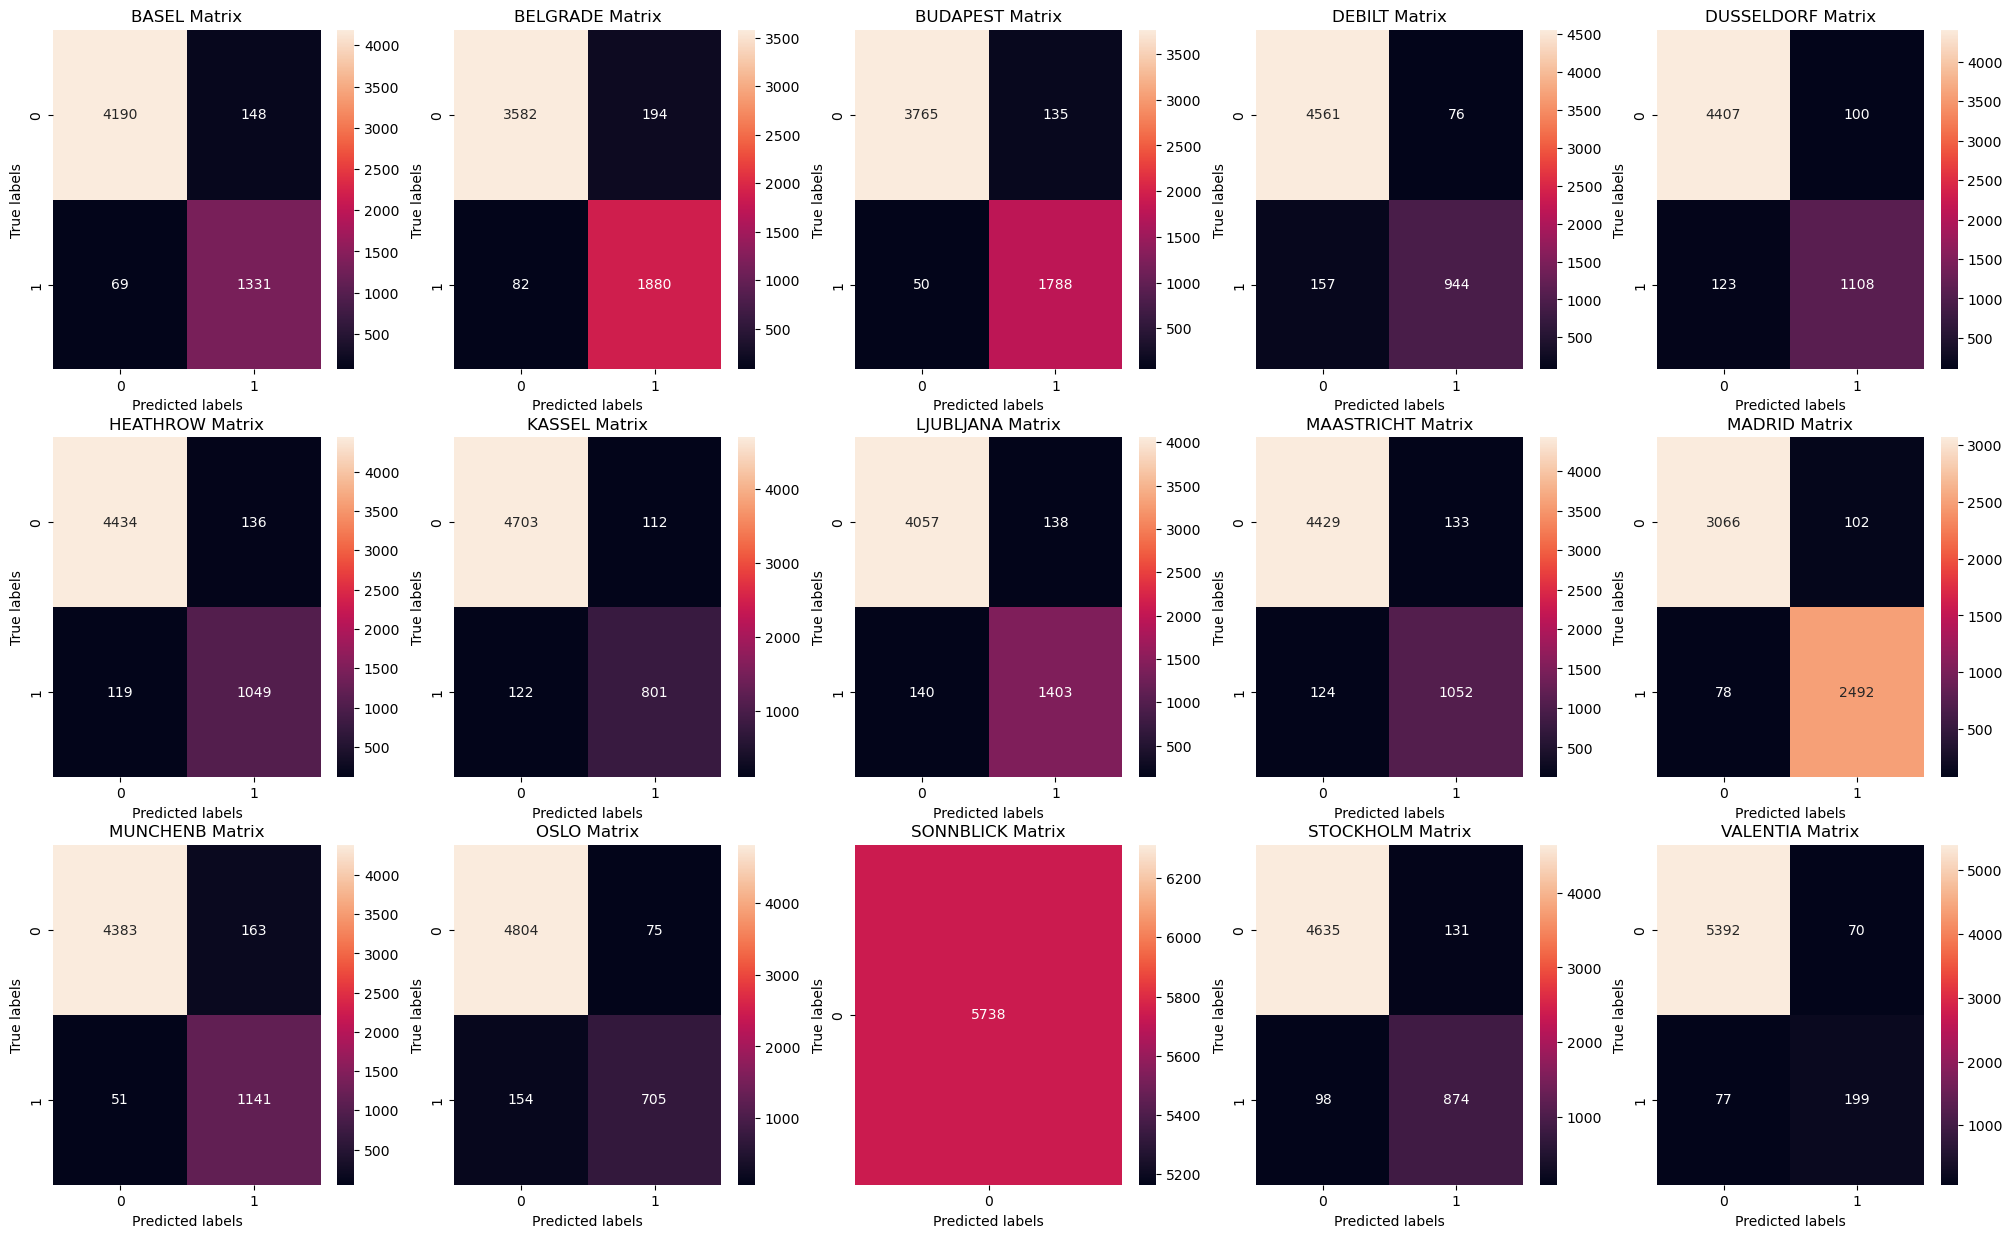

In [63]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], mlp_model.predict(X_test)[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

plt.show()